In [3]:
import pandas as pd
import numpy as np

In [6]:
data_movies=pd.read_csv("C:\\Users\\Tejas\\movie_data\\movies.csv")

In [7]:
print(data_movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [9]:
data_movies.shape

(9742, 3)

In [10]:
data_ratings=pd.read_csv("C:\\Users\\Tejas\\movie_data\\ratings.csv")

In [11]:
print(data_ratings)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [12]:
data_ratings.shape

(100836, 4)

In [14]:
unique_user_count = data_ratings['userId'].nunique()

In [15]:
print(unique_user_count)

610


In [16]:
ratings_count = data_ratings.groupby('movieId')['userId'].count()

In [17]:
max_ratings_movie_id = ratings_count.idxmax()

In [19]:
print(max_ratings_movie_id)

356


In [24]:
max_ratings_movie_title = data_movies[data_movies['movieId'] == max_ratings_movie_id]['title'].values[0]
print(max_ratings_movie_title)

Forrest Gump (1994)


In [26]:
data_tags=pd.read_csv("C:\\Users\\Tejas\\movie_data\\tags.csv")
print(data_tags)

      userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]


In [27]:
matrix_movie_id = data_movies[data_movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

In [29]:
matrix_tags = data_tags[data_tags['movieId'] == matrix_movie_id]['tag'].values
print(matrix_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [30]:
terminator_2_id=data_movies[data_movies['title']=='Terminator 2: Judgment Day (1991)']['movieId'].values[0]

In [31]:
terminator_ratings = data_ratings[data_ratings['movieId'] == terminator_2_id]['rating']

In [33]:
average_rating = terminator_ratings.mean()
print(average_rating)

3.970982142857143


In [34]:
import matplotlib.pyplot as plt

In [36]:
fight_club_id=data_movies[data_movies['title']=='Fight Club (1999)']['movieId'].values[0]

In [37]:
fight_club_ratings = data_ratings[data_ratings['movieId'] == fight_club_id]['rating']

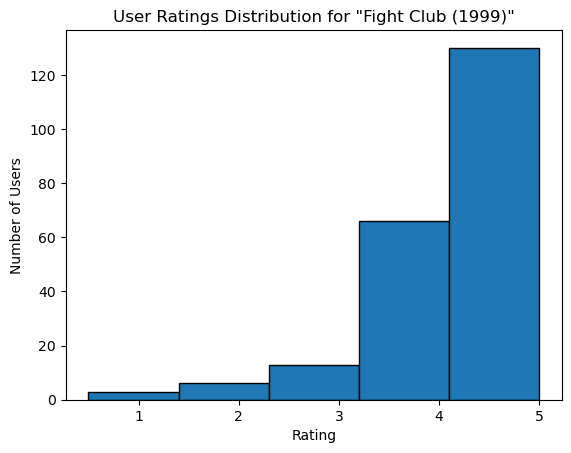

In [38]:
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

### Mandatory Operations

In [40]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = data_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()


In [41]:
# Renaming the columns for better clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [45]:
# Step 2: Inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(data_movies, grouped_ratings, on='movieId', how='inner')

In [46]:
# Step 3: Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

In [47]:
print(filtered_data)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [49]:
most_popular_movie = filtered_data.loc[filtered_data['rating_mean'].idxmax()]
print(most_popular_movie)

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object


In [52]:
top_movies_by_ratings = filtered_data.sort_values(by='rating_count', ascending=False).head(5)
print(top_movies_by_ratings)

      movieId                             title                       genres  \
314       356               Forrest Gump (1994)     Comedy|Drama|Romance|War   
277       318  Shawshank Redemption, The (1994)                  Crime|Drama   
257       296               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller   
510       593  Silence of the Lambs, The (1991)        Crime|Horror|Thriller   
1938     2571                Matrix, The (1999)       Action|Sci-Fi|Thriller   

      rating_count  rating_mean  
314            329     4.164134  
277            317     4.429022  
257            307     4.197068  
510            279     4.161290  
1938           278     4.192446  


In [53]:
# Filter Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

In [54]:
# Sort Sci-Fi movies by rating_count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

In [56]:
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
print(third_most_popular_sci_fi_movie)

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    request_header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0'
    }
    
    response = requests.get(URL, headers=request_header)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})
        
        return float(imdb_rating.text) if imdb_rating else np.nan
    else:
        print(f"Error: Unable to fetch data for movie with IMDb ID {imdbId}. Status code: {response.status_code}")
        return np.nan

# Load your DataFrame with the subset of movies (assuming you have it)
data_links = pd.read_csv("C:\\Users\\Tejas\\movie_data\\links.csv")

# Add a new column 'imdb_rating' to your DataFrame
data_links['imdb_rating'] = data_links['imdbId'].apply(scrapper)

# Find the movieId with the highest IMDb rating
highest_rated_movie_id = df_links.loc[df_links['imdb_rating'].idxmax(), 'movieId']

print(f"The movieId of the movie with the highest IMDb rating is: {highest_rated_movie_id}")


Error: Unable to fetch data for movie with IMDb ID 118114. Status code: 404
